In [30]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [32]:
df_deliveries = pd.read_csv("deliveries.csv")
df_matches = pd.read_csv("matches.csv")

In [33]:
df_deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [34]:
df_matches.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [35]:
# Merge using left join
merged_df = df_deliveries.merge(df_matches[['id', 'season']], left_on='match_id', right_on='id')


In [36]:
merged_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,season
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,335982,2007/08
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,335982,2007/08
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08


In [37]:
sixes_df = merged_df[merged_df['batsman_runs'] == 6]
sixes_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,season
10,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,Z Khan,SC Ganguly,6,0,6,NaN,0,NaN,NaN,NaN,335982,2007/08
20,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,2,BB McCullum,AA Noffke,SC Ganguly,6,0,6,NaN,0,NaN,NaN,NaN,335982,2007/08
25,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,7,BB McCullum,AA Noffke,SC Ganguly,6,0,6,NaN,0,NaN,NaN,NaN,335982,2007/08
60,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,9,5,BB McCullum,SB Joshi,RT Ponting,6,0,6,NaN,0,NaN,NaN,NaN,335982,2007/08
65,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,10,4,RT Ponting,JH Kallis,BB McCullum,6,0,6,NaN,0,NaN,NaN,NaN,335982,2007/08


In [38]:
sixes_count = sixes_df.groupby(['season', 'batter']).size().reset_index(name='sixes_count')
sixes_count.head()


,season,batter,sixes_count
0,2007/08,A Symonds,9
1,2007/08,AB Agarkar,2
2,2007/08,AB de Villiers,1
3,2007/08,AC Gilchrist,19
4,2007/08,AD Mascarenhas,1


In [39]:
total_runs = merged_df.groupby(['season', 'batter'])['batsman_runs'].sum()
total_runs


season   batter           
2007/08  A Chopra              42
         A Kumble              13
         A Mishra              37
         A Mukund               0
         A Nehra                3
                             ... 
2024     WG Jacks             230
         WP Saha              136
         Washington Sundar      0
         YBK Jaiswal          435
         Yudhvir Singh         21
Name: batsman_runs, Length: 2617, dtype: int64

In [41]:
runs_df = merged_df.groupby(['season', 'batter'])['batsman_runs'].sum()
runs_df


season   batter           
2007/08  A Chopra              42
         A Kumble              13
         A Mishra              37
         A Mukund               0
         A Nehra                3
                             ... 
2024     WG Jacks             230
         WP Saha              136
         Washington Sundar      0
         YBK Jaiswal          435
         Yudhvir Singh         21
Name: batsman_runs, Length: 2617, dtype: int64

In [42]:
final = pd.merge(sixes_count, total_runs, on=['season', 'batter'])
final['runs_from_sixes'] = final['sixes_count'] * 6

final


,season,batter,sixes_count,batsman_runs,runs_from_sixes
0,2007/08,A Symonds,9,161,54
1,2007/08,AB Agarkar,2,54,12
2,2007/08,AB de Villiers,1,95,6
3,2007/08,AC Gilchrist,19,436,114
4,2007/08,AD Mascarenhas,1,9,6
...,...,...,...,...,...
1623,2024,VR Iyer,19,370,114
1624,2024,WG Jacks,18,230,108
1625,2024,WP Saha,3,136,18
1626,2024,YBK Jaiswal,16,435,96


In [43]:

top2 = (final.sort_values(['season', 'sixes_count'], ascending=[True, False]).groupby('season').head(2))
top2

,season,batter,sixes_count,batsman_runs,runs_from_sixes
80,2007/08,ST Jayasuriya,31,514,186
70,2007/08,SE Marsh,26,616,156
102,2009,AC Gilchrist,29,495,174
138,2009,ML Hayden,22,572,132
245,2009/10,RV Uthappa,27,374,162
223,2009/10,M Vijay,26,458,156
286,2011,CH Gayle,44,608,264
323,2011,MS Dhoni,23,392,138
388,2012,CH Gayle,59,733,354
389,2012,CL White,20,479,120


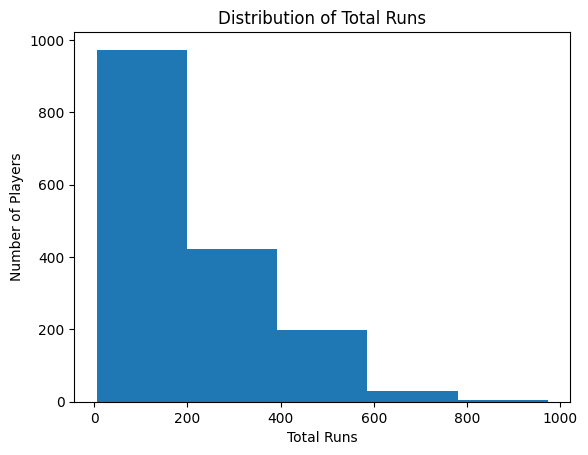

In [46]:
import matplotlib.pyplot as plt

plt.hist(final['batsman_runs'], bins=5,)

plt.xlabel('Total Runs')
plt.ylabel('Number of Players')
plt.title('Distribution of Total Runs')
plt.show()


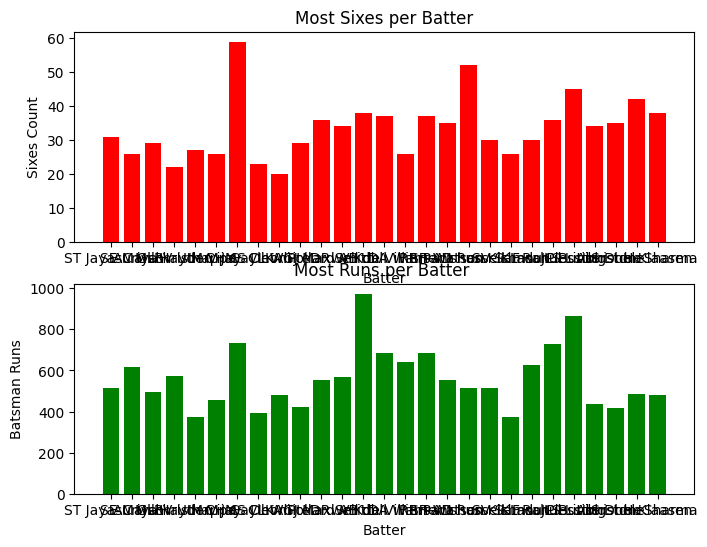

In [54]:

fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].bar(top2['batter'],
             top2['sixes_count'], color='red')
axes[0].set_title('Most Sixes per Batter')
axes[0].set_xlabel('Batter')
axes[0].set_ylabel('Sixes Count')


axes[1].bar(top2['batter'], 
            top2['batsman_runs'], color='green')
axes[1].set_title('Most Runs per Batter ')
axes[1].set_xlabel('Batter')
axes[1].set_ylabel('Batsman Runs')

plt.show()
